In [1]:
import pandas as pd
import pickle 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import plotly.express as px
df = pd.read_pickle("dfTEST.pkl")
df

errcode  data.id  data.hobjId  data.pdId  data.developer.devId  \
0          0    42011       122577     461771                   596   
1          0     9333        20092      19811                  1927   
2          0    11591        20923      24248                  1927   
3          0    20765        20990      33022                  1927   
4          0    20764        21057      33022                  1927   
...      ...      ...          ...        ...                   ...   
9995       0    41457       121988     474925                 12618   
9996       0    47738       128367     627871                 14722   
9997       0    21355        32893      53677                  6628   
9998       0    37749       118152     273650                  9295   
9999       0    32098        42512     164251                  7993   

     data.developer.devShortCleanNm data.developer.devShortNm  \
0          СЗ ЛСР.НЕДВИЖИМОСТЬ-УРАЛ  СЗ ЛСР.НЕДВИЖИМОСТЬ-УРАЛ   
1                   СЗ ЛСР.ОБЪЕКТ-М           СЗ ЛСР.ОБЪЕКТ-М   
2                   СЗ ЛСР.ОБЪЕКТ-М           СЗ ЛСР.ОБЪЕКТ-М   
3                   СЗ ЛСР.ОБЪЕКТ-М           СЗ ЛСР.ОБЪЕКТ-М   
4                   СЗ ЛСР.ОБЪЕКТ-М           СЗ ЛСР.ОБЪЕКТ-М   
...                             ...                       ...   
9995              СОЗДАТЕЛИ. ПЕРВЫЙ         СОЗДАТЕЛИ. ПЕРВЫЙ   
9996              СОЗДАТЕЛИ. ТРЕТИЙ         СОЗДАТЕЛИ. ТРЕТИЙ   
9997                       СОЛО ЛЛП                  СОЛО ЛЛП   
9998              СОФТ-НЕДВИЖИМОСТЬ         СОФТ-НЕДВИЖИМОСТЬ   
9999               СОЧИСТРОЙ-ИНВЕСТ          СОЧИСТРОЙ-ИНВЕСТ   

                          data.developer.devFullCleanNm  \
0     СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛСР.НЕДВИЖИМОСТЬ...   
1            СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛСР.ОБЪЕКТ-М   
2            СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛСР.ОБЪЕКТ-М   
3            СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛСР.ОБЪЕКТ-М   
4            СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ЛСР.ОБЪЕКТ-М   
...                                                 ...   
9995  СОЗДАТЕЛИ. ПЕРВЫЙ . СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК   
9996   СОЗДАТЕЛИ. ТРЕТИЙ. СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК   
9997                                           СОЛО ЛЛП   
9998    СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК СОФТ-НЕДВИЖИМОСТЬ   
9999                                   СОЧИСТРОЙ-ИНВЕСТ   

      data.developer.problObjCnt  data.developer.buildObjCnt  ...  \
0                              0                           6  ...   
1                              0                           5  ...   
2                              0                           5  ...   
3                              0                           5  ...   
4                              0                           5  ...   
...                          ...                         ...  ...   
9995                           0                           4  ...   
9996                           0                           1  ...   
9997                           0                           1  ...   
9998                           0                           1  ...   
9999                           0                           1  ...   

      data.metro.time data.metro.isWalk data.metro.colors  \
0                 NaN               NaN               NaN   
1           18.133333              True         [#CC4C6E]   
2           21.266667              True         [#CC4C6E]   
3           12.966667              True         [#CC4C6E]   
4           11.700000              True         [#CC4C6E]   
...               ...               ...               ...   
9995              NaN               NaN               NaN   
9996              NaN               NaN               NaN   
9997              NaN               NaN               NaN   
9998              NaN               NaN               NaN   
9999              NaN               NaN               NaN   

     data.greenAreaIndexValue data.airQualityIndexValue data.complexShortNm  \
0                    

In [2]:
df1 = df[['data.developer.regRegionDesc','data.objPriceAvg']]
df1

data.developer.regRegionDesc  data.objPriceAvg
0            Свердловская область          101792.0
1                    Москва город          268620.0
2                    Москва город          383434.0
3                    Москва город          400735.0
4                    Москва город          380203.0
...                           ...               ...
9995            Тюменская область           94569.0
9996            Тюменская область               NaN
9997              Крым Республика          135751.0
9998           Ростовская область          130793.0
9999           Краснодарский край           46099.0

[10000 rows x 2 columns]

In [3]:
df1.dropna(inplace=True)

C:\Users\jakek\AppData\Local\Temp\ipykernel_12112\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [4]:
df2 = df1.groupby('data.developer.regRegionDesc', as_index=False)\
['data.objPriceAvg'].mean().sort_values(by=['data.objPriceAvg'], ascending=False)
df2

data.developer.regRegionDesc  data.objPriceAvg
35                         Москва город     269779.862921
49                Санкт-Петербург город     187364.531250
54                    Севастополь город     174481.400000
52                  Сахалинская область     149895.055556
31                Ленинградская область     143498.507692
..                                  ...               ...
58                   Тамбовская область      56366.571429
25                  Костромская область      54378.766667
55  Северная Осетия - Алания Республика      53451.750000
20                  Калмыкия Республика      53332.400000
14                  Дагестан Республика      33956.400000

[74 rows x 2 columns]

In [5]:
df2 = df2.set_index('data.developer.regRegionDesc')

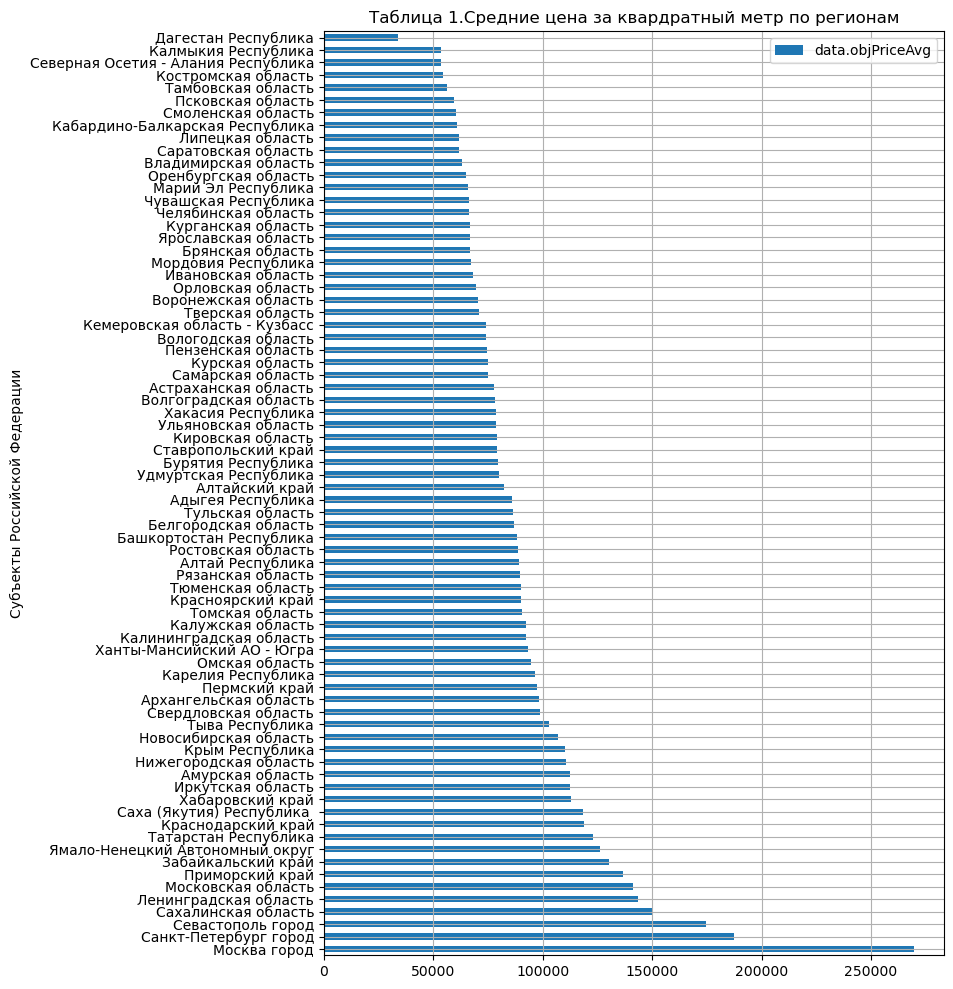

In [6]:
rcParams['figure.figsize'] = 8,12
df2.sort_values(ascending=False,by=['data.objPriceAvg'],).plot(kind='barh')
plt.title('Таблица 1.Средние цена за квардратный метр по регионам')
plt.ylabel("Субъекты Российской Федерации")
plt.grid('black')
plt.show()

In [9]:
# Таблица 1 наглядно показывает, что наибольшая стоимость жилья 
# за квадратный метр наблюдается в Москве, Санкт-Петербурге и Севастополе.
# Наименьшая в Дагестане, Калмыкии и Осетии.
# Средняя цена за квадратный метр по регионам от 50000 до 100000

In [7]:
df3 = df[['data.developer.regRegionDesc','data.objReady100PercDt','data.objFlatSq']]
df3

data.developer.regRegionDesc data.objReady100PercDt data.objFlatSq
0            Свердловская область             2023-09-30        14263.7
1                    Москва город             2023-12-31        17989.7
2                    Москва город             2023-06-30        75813.6
3                    Москва город             2022-12-31        23888.5
4                    Москва город             2022-12-31        32294.5
...                           ...                    ...            ...
9995            Тюменская область             2023-06-30         8785.1
9996            Тюменская область             2024-03-31        5802.52
9997              Крым Республика             2022-12-31            0.0
9998           Ростовская область             2024-12-31       16395.11
9999           Краснодарский край             2023-06-30            0.0

[10000 rows x 3 columns]

In [8]:
df3.dropna()

data.developer.regRegionDesc data.objReady100PercDt data.objFlatSq
0            Свердловская область             2023-09-30        14263.7
1                    Москва город             2023-12-31        17989.7
2                    Москва город             2023-06-30        75813.6
3                    Москва город             2022-12-31        23888.5
4                    Москва город             2022-12-31        32294.5
...                           ...                    ...            ...
9995            Тюменская область             2023-06-30         8785.1
9996            Тюменская область             2024-03-31        5802.52
9997              Крым Республика             2022-12-31            0.0
9998           Ростовская область             2024-12-31       16395.11
9999           Краснодарский край             2023-06-30            0.0

[9866 rows x 3 columns]

In [9]:
df3['year'] = pd.DatetimeIndex(df3['data.objReady100PercDt']).year


C:\Users\jakek\AppData\Local\Temp\ipykernel_12112\3776299415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['year'] = pd.DatetimeIndex(df3['data.objReady100PercDt']).year


In [10]:
df3

data.developer.regRegionDesc data.objReady100PercDt data.objFlatSq  year
0            Свердловская область             2023-09-30        14263.7  2023
1                    Москва город             2023-12-31        17989.7  2023
2                    Москва город             2023-06-30        75813.6  2023
3                    Москва город             2022-12-31        23888.5  2022
4                    Москва город             2022-12-31        32294.5  2022
...                           ...                    ...            ...   ...
9995            Тюменская область             2023-06-30         8785.1  2023
9996            Тюменская область             2024-03-31        5802.52  2024
9997              Крым Республика             2022-12-31            0.0  2022
9998           Ростовская область             2024-12-31       16395.11  2024
9999           Краснодарский край             2023-06-30            0.0  2023

[10000 rows x 4 columns]

In [14]:
df3 = df3.drop(columns='data.objReady100PercDt') 
df3

data.developer.regRegionDesc data.objFlatSq  year
0            Свердловская область        14263.7  2023
1                    Москва город        17989.7  2023
2                    Москва город        75813.6  2023
3                    Москва город        23888.5  2022
4                    Москва город        32294.5  2022
...                           ...            ...   ...
9995            Тюменская область         8785.1  2023
9996            Тюменская область        5802.52  2024
9997              Крым Республика            0.0  2022
9998           Ростовская область       16395.11  2024
9999           Краснодарский край            0.0  2023

[10000 rows x 3 columns]

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   data.developer.regRegionDesc  9866 non-null   object
 1   data.objReady100PercDt        10000 non-null  object
 2   data.objFlatSq                10000 non-null  object
 3   year                          10000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [12]:
df3[['data.objFlatSq']] = df3[['data.objFlatSq']].astype(float)
df.dtypes

C:\Users\jakek\AppData\Local\Temp\ipykernel_12112\2930032728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['data.objFlatSq']] = df3[['data.objFlatSq']].astype(float)


errcode                                            object
data.id                                             int64
data.hobjId                                         int64
data.pdId                                           int64
data.developer.devId                                int64
                                                   ...   
data.complexShortNm                                object
data.developer.bankruptStage.bankruptStageCd      float64
data.developer.bankruptStage.bankruptStageDesc     object
data.developer.bankruptStage.bankruptLawUrl        object
data.developer.orgBankruptMsgDttm                  object
Length: 111, dtype: object

In [13]:
df3.dtypes

data.developer.regRegionDesc     object
data.objReady100PercDt           object
data.objFlatSq                  float64
year                              int64
dtype: object

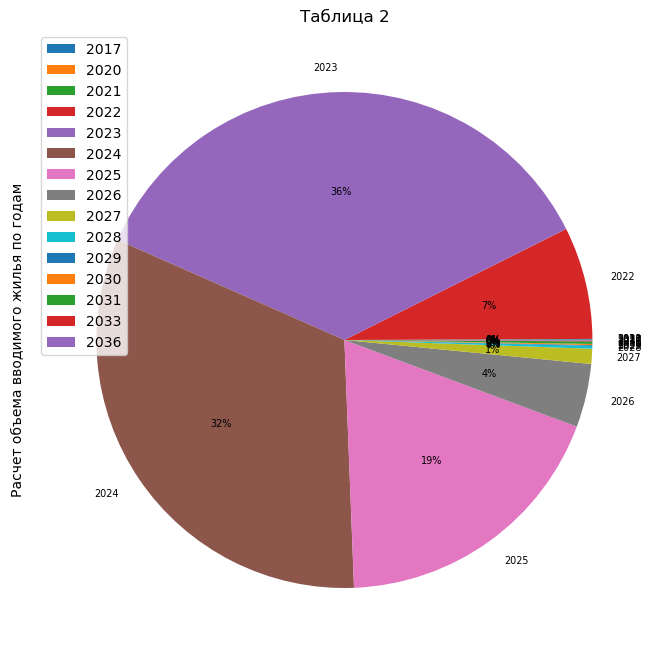

In [16]:
df3.groupby(['year']).sum().plot(
    kind='pie', y='data.objFlatSq', textprops={'fontsize':7}, autopct='%1.0f%%')
plt.title('Таблица 2')
plt.ylabel('Расчет объема вводимого жилья по годам')
plt.show()

In [ ]:
# Таблица 2 наглядно показывает, что по данным сайта наш.дом.рф наибольшая сдача строящихся объектов
# планируется в 2023 (36% от общего объема строящихся квартир)
# и 2024 (32 процента от общего объема строящихся квартир)

In [17]:
df3['data.objFlatSq'] = pd.to_numeric(df3['data.objFlatSq'])

C:\Users\jakek\AppData\Local\Temp\ipykernel_12112\2516455303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['data.objFlatSq'] = pd.to_numeric(df3['data.objFlatSq'])


In [ ]:
# Оъбеденил по областям без учета года

In [46]:
df3_byregion = df3[['data.developer.regRegionDesc', 'data.objFlatSq']]
df3_byregion = df3_byregion.groupby('data.developer.regRegionDesc').sum()

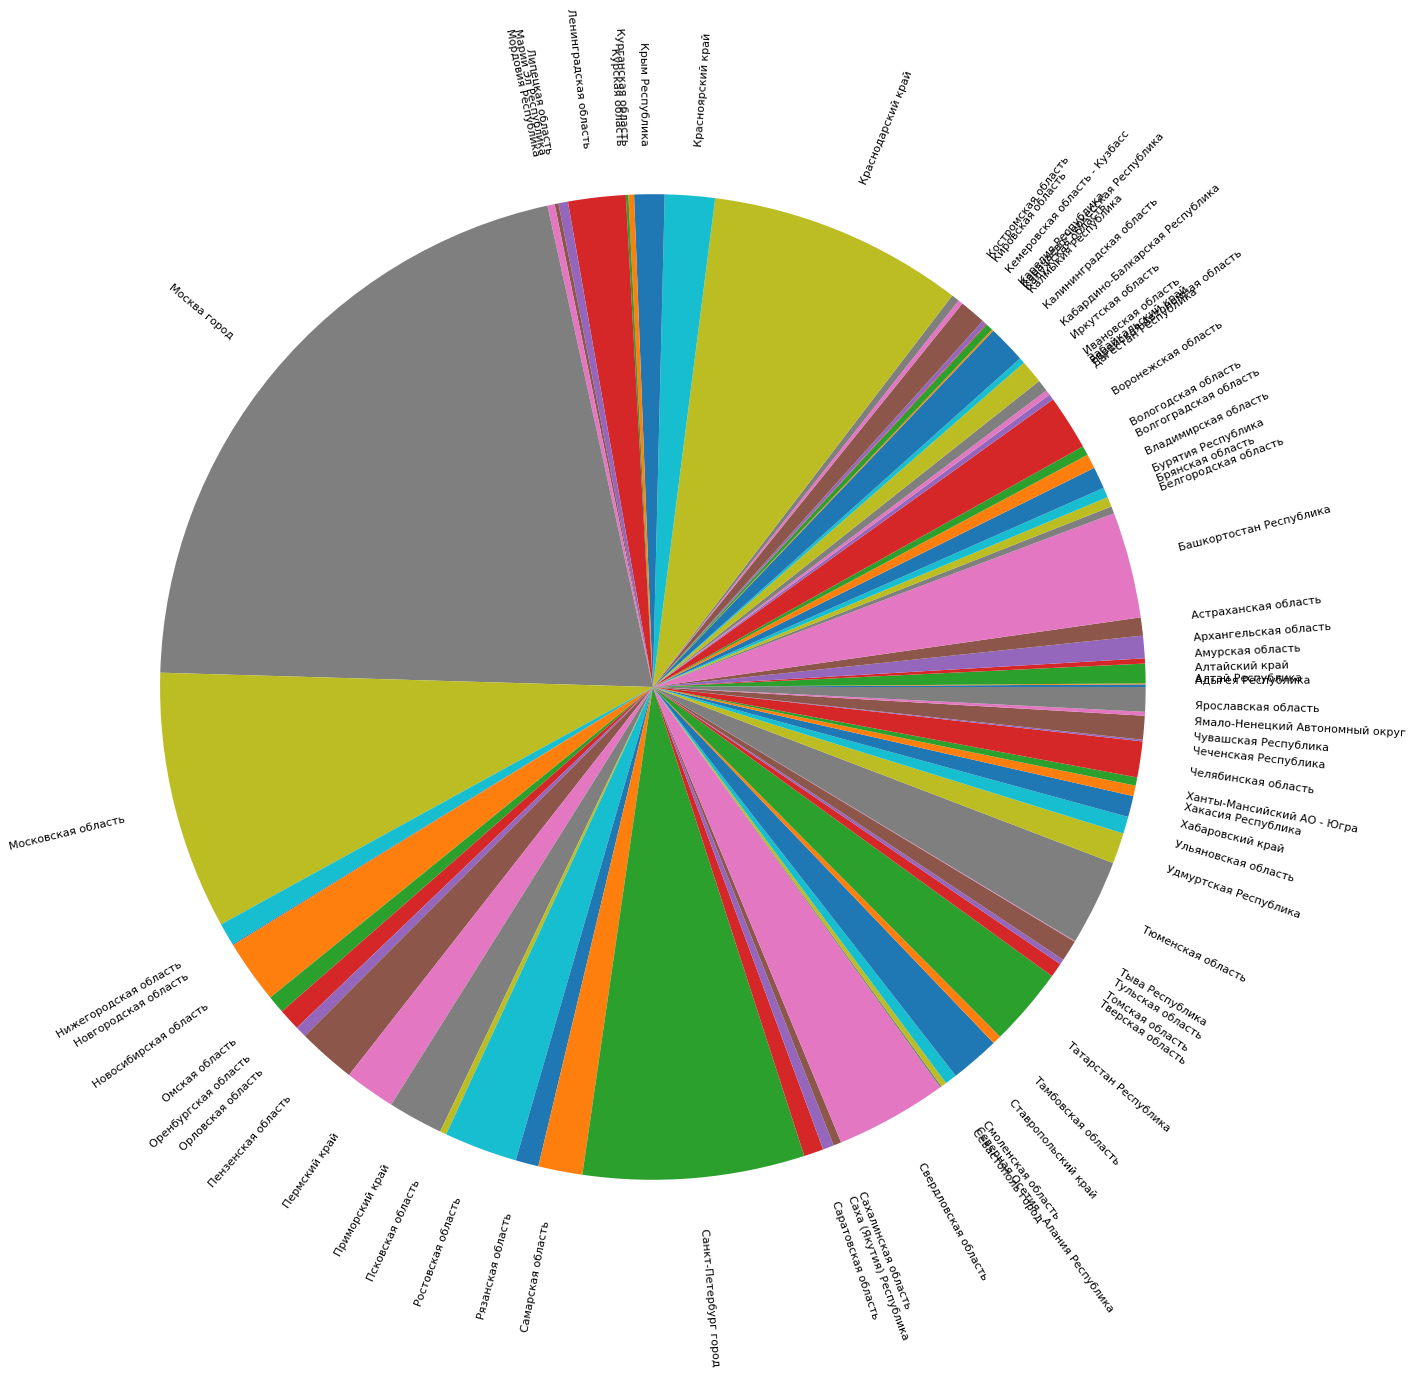

In [19]:
fig = plt.figure(figsize=(20, 20), dpi=80)
plot = plt.pie(df3_byregion['data.objFlatSq'], labels=df3_byregion.index, rotatelabels=True)
plt.savefig('sample.png')

In [ ]:
# По годам и регионам

In [20]:
# найдем промежуток по годам
year_min = df3['year'].min()
year_max = df3['year'].max()

In [ ]:
# Выдделяю непустые года

In [21]:
years = []

for year in range(year_min, year_max):
  data = df3.loc[df3['year'] == year].groupby('data.developer.regRegionDesc').sum()
  if not data.empty:
    years.append(year)
print(years)

[2017, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2033]


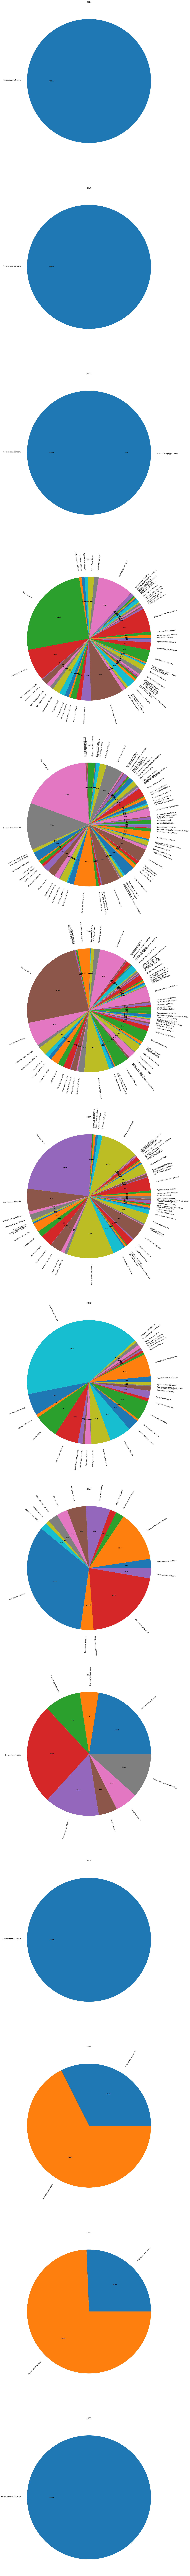

In [22]:
num_years = len(years)
fig, axs = plt.subplots(num_years, figsize=(100, num_years*20), subplot_kw=dict(aspect="equal"))

for i,year in enumerate(years):
  data = df3.loc[df3['year'] == year].groupby('data.developer.regRegionDesc').sum()
  x_data = data['data.objFlatSq'].to_numpy()
  regions = data.index

  wedges, texts, autotexts = axs[i].pie(x_data, autopct='%.2f', labels=regions, rotatelabels=True)

  plt.setp(autotexts, size=8, weight="bold")
  axs[i].set_title(f'{year}')
plt.show()

In [22]:
# Лидеры как и ожидалось Москва и Московская область и Краснодарский край.


In [ ]:
# Выделим DF для того, чтобы проанализировать этажность домов, количество квартир,
# жилплощадь, количество парковочных мест, цену за квадратный метр в разных регионах.

In [23]:
df4 = df[['data.developer.regRegionDesc','data.objPriceAvg',
          'data.objElemLivingCnt', 'data.objSquareLiving',
          'data.objElemParkingCnt', 'data.objFloorCnt']]
df4

data.developer.regRegionDesc  data.objPriceAvg  data.objElemLivingCnt  \
0            Свердловская область          101792.0                    436   
1                    Москва город          268620.0                    356   
2                    Москва город          383434.0                   1293   
3                    Москва город          400735.0                    363   
4                    Москва город          380203.0                    483   
...                           ...               ...                    ...   
9995            Тюменская область           94569.0                    182   
9996            Тюменская область               NaN                     97   
9997              Крым Республика          135751.0                      0   
9998           Ростовская область          130793.0                    208   
9999           Краснодарский край           46099.0                      0   

      data.objSquareLiving  data.objElemParkingCnt  data.objFloorCnt  
0                 14263.70                       0                26  
1                 17989.70                     110                17  
2                 75813.60                     596                16  
3                 23888.50                     968                26  
4                 32294.50                     219                43  
...                    ...                     ...               ...  
9995               8785.10                       0                11  
9996               5802.52                       0                15  
9997                  0.00                       0                24  
9998              16395.11                      97                26  
9999                  0.00                       0                11  

[10000 rows x 6 columns]

In [24]:
df4.dropna(inplace=True)

C:\Users\jakek\AppData\Local\Temp\ipykernel_12112\1595090722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


In [ ]:
# Визуализируем разброс показателей

In [25]:
import matplotlib

In [26]:
# всевозможные области
labels = df4['data.developer.regRegionDesc']

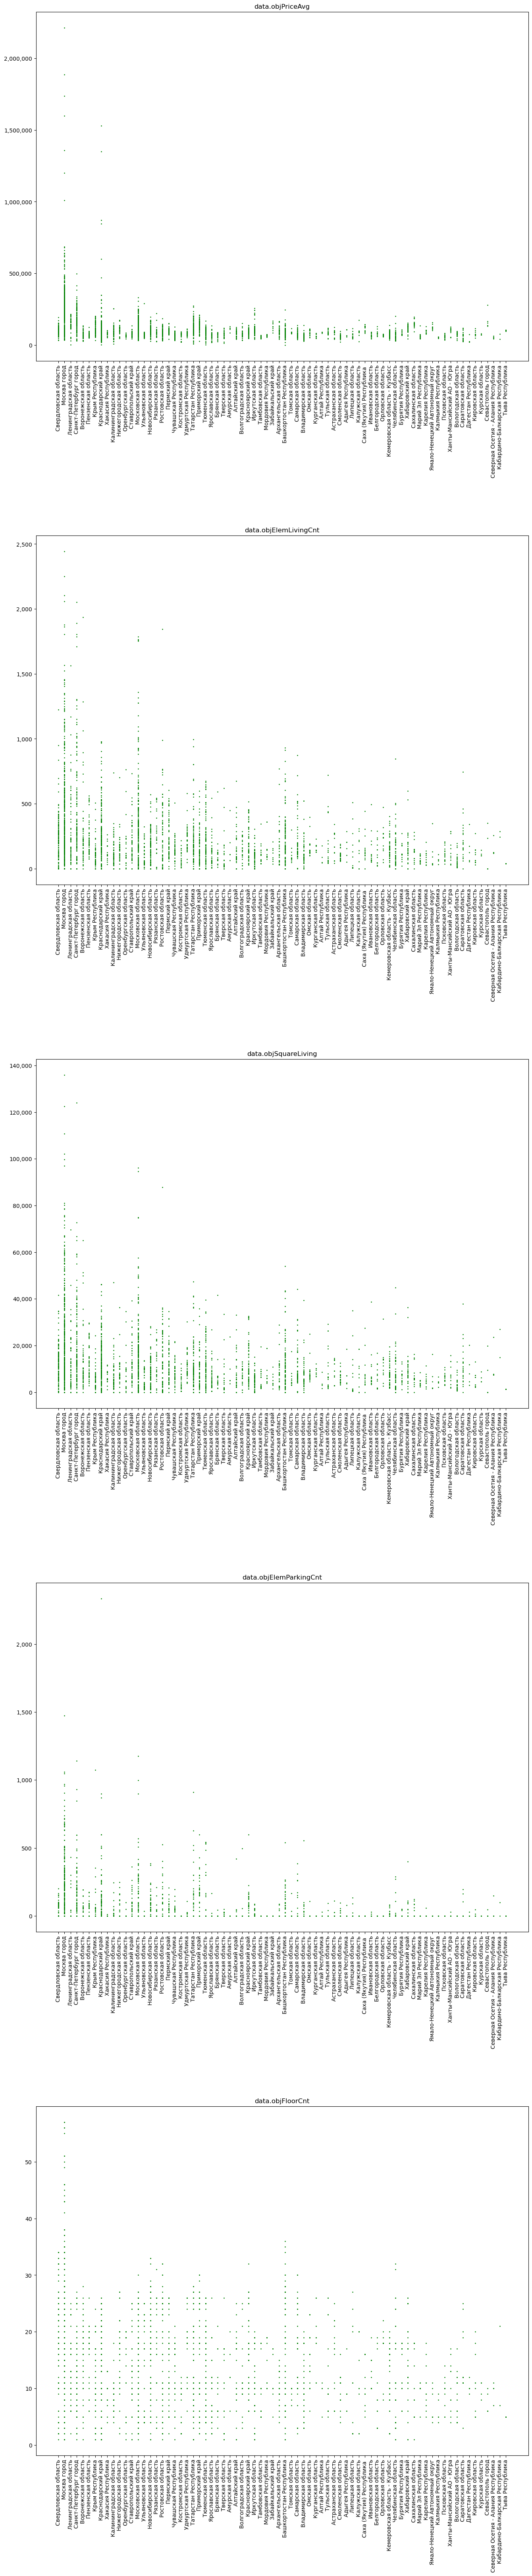

In [27]:
# выбираем столбцы с типом numeric
numeric = df4.select_dtypes(include=np.number)
# смотрим сколько таких показателей
_, y_shape = numeric.shape
fig, axs = plt.subplots(y_shape, figsize=(16, y_shape*16))
plt.subplots_adjust(hspace=0.5)

for i, (column_name, column_data) in enumerate(numeric.iteritems()):
  y = column_data.to_numpy()
  # s - радиус точек
  axs[i].scatter(labels, y, color='green', s=0.5)
  for tick in axs[i].get_xticklabels():
    tick.set_rotation(90)
  axs[i].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  axs[i].set_title(f'{column_name}')

In [ ]:
# Связь показателей для всего df покажем с помощью матрицы корреляций

In [28]:
numeric = df4.select_dtypes(include=np.number)

corr = numeric.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
# Аналогично по регионам можно построить матрицу кореляций

In [29]:
import random

In [59]:
def corr_for_region(region_name):
  df_tmp = df4.loc[df4['data.developer.regRegionDesc'] == region_name]
  numeric = df_tmp.select_dtypes(include=np.number)
  corr = numeric.corr()
  return corr

rg_names = df4['data.developer.regRegionDesc'].unique()
# выбирает рандомный регион
random_region = random.choice(rg_names) 
corr = corr_for_region(random_region)
print(random_region)
corr.style.background_gradient(cmap='coolwarm')
# rg_names[номер региона] - можно использовать для выбора конкретного региона

Ставропольский край


In [ ]:
# Используя данную матрицу, вывод и взаимосвязи можно сдлеать по каждому соотношению, в разных регионах по разному.